Pulse-coupled neural networks (PCNN)

Izhikevich E.M. Simple Model of Spiking neurons// IEEE transactions on neural networks. V.14. N.6. 2003. PP.1569-1572


In [1]:
from numpy import *

In [2]:
Ne=800
Ni=200
re=random.rand(Ne)
ri=random.rand(Ni)
a=r_[0.02*ones(Ne),0.02+0.08*ri]
b=r_[0.2*ones(Ne),0.25-0.05*ri]
c=r_[-65+15*re**2,-65*ones(Ni)]
d=r_[8-6*re**2,2*ones(Ni)]
w=c_[0.5*random.rand(Ne+Ni,Ne), -random.rand(Ne+Ni,Ni)]
VR=-65
V=VR*ones(Ne+Ni)
U=b*V
out_spikes=array([[],[]])
out_v_first=array([[],[]])
VP=30
t=0
st=1000
dt=1
dt_2=.5*dt
indexs=arange(Ne+Ni)

In [3]:
while t<=st:
    I=r_[5*random.randn(Ne),2*random.randn(Ni)]
    #I=r_[5*ones(Ne),2*ones(Ni)]
    m=V>=VP
    vspikes=V[m]
    out_spikes=c_[out_spikes,array([t*ones_like(vspikes),indexs[m]])]
    V[m]=c[m]
    U[m]+=d[m]
    I+=sum(w[:,m],1)
    V+=dt_2*(0.04*V**2+5*V+140-U+I)
    V+=dt_2*(0.04*V**2+5*V+140-U+I)
    U+=dt*a*(b*V-U)
    out_v_first=c_[out_v_first,array([t,V[0]])]
    t+=dt

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

/opt/distr/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


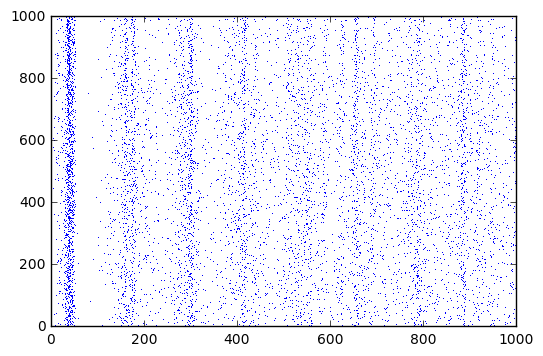

In [5]:
plt.plot(out_spikes[0,:],out_spikes[1,:],',')

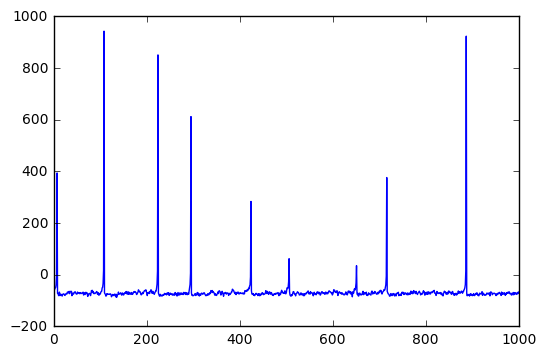

In [6]:
plt.plot(out_v_first[0,:],out_v_first[1,:],'-')